In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [88]:
data = pd.read_csv('fc.txt', header=None)
data.columns = ['var', 'skew', 'curt', 'entr', 'auth']
data.to_csv('fc.csv', index = None)


In [89]:
#Displaying top 5 rows
print(data.head())

       var    skew    curt     entr  auth
0  3.62160  8.6661 -2.8073 -0.44699     0
1  4.54590  8.1674 -2.4586 -1.46210     0
2  3.86600 -2.6383  1.9242  0.10645     0
3  3.45660  9.5228 -4.0112 -3.59440     0
4  0.32924 -4.4552  4.5718 -0.98880     0


In [90]:
#Displaying last 10 rows
print(data.tail(10))

          var      skew       curt     entr  auth
1362 -2.16680   1.59330   0.045122 -1.67800     1
1363 -1.16670  -1.42370   2.924100  0.66119     1
1364 -2.83910  -6.63000  10.484900 -0.42113     1
1365 -4.50460  -5.81260  10.886700 -0.52846     1
1366 -2.41000   3.74330  -0.402150 -1.29530     1
1367  0.40614   1.34920  -1.450100 -0.55949     1
1368 -1.38870  -4.87730   6.477400  0.34179     1
1369 -3.75030 -13.45860  17.593200 -2.77710     1
1370 -3.56370  -8.38270  12.393000 -1.28230     1
1371 -2.54190  -0.65804   2.684200  1.19520     1


In [91]:
#Checking for NULL values
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

In [92]:
#Data types in our dataset
data.dtypes

var     float64
skew    float64
curt    float64
entr    float64
auth      int64
dtype: object

# DATA VISUALISATION

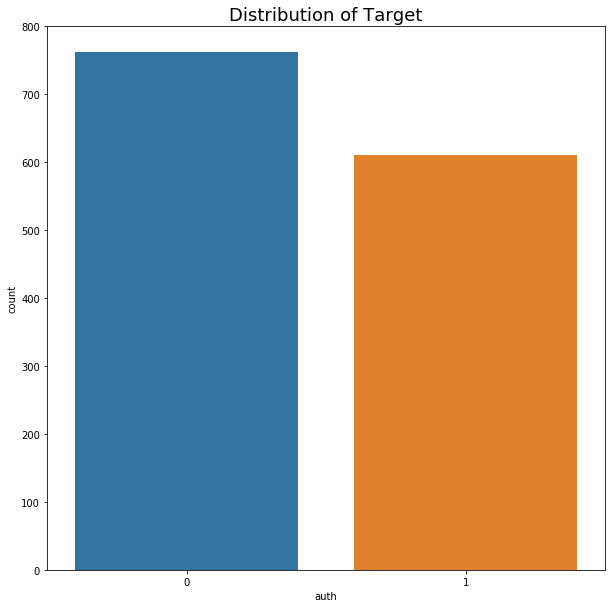

In [93]:
plt.figure(figsize=(10, 10))
plt.title('Distribution of Target', size=18)
sns.countplot(x ='auth', data = data)
plt.show()

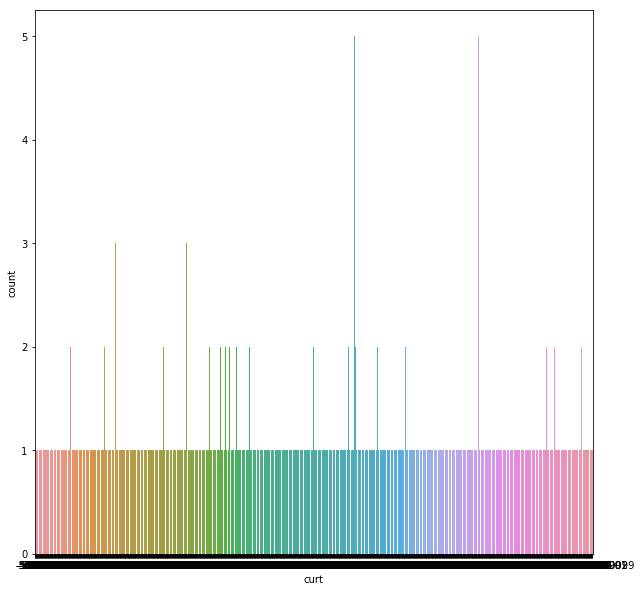

In [94]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='curt', data = data)
plt.show()

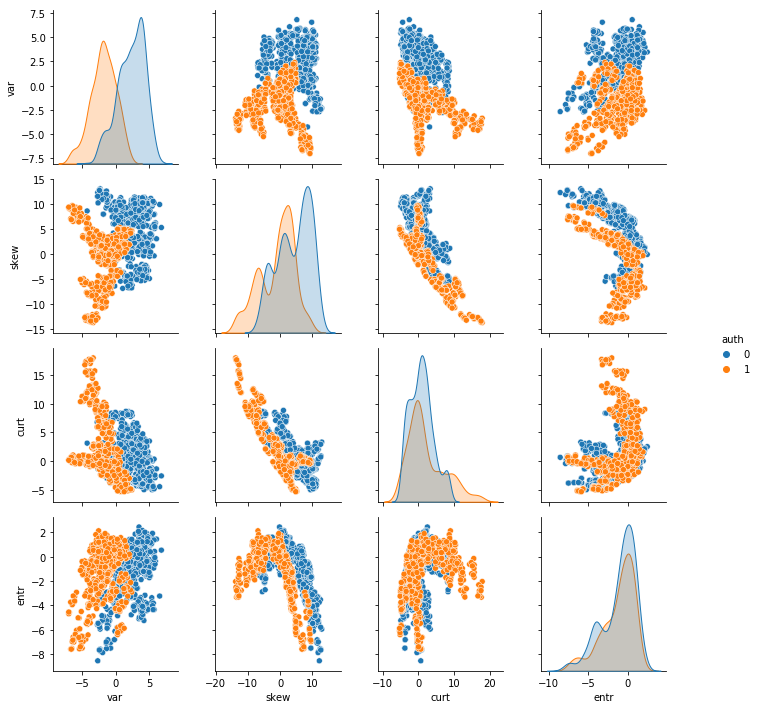

In [95]:
sns.pairplot(data, hue='auth')
plt.show()

DEFINING OUR X AND Y

In [96]:
X = data[data.columns[0:4]]
Y = data[data.columns[4]]

In [97]:
X

,var,skew,curt,entr
0,3.621600,8.66610,-2.807300,-0.446990
1,4.545900,8.16740,-2.458600,-1.462100
2,3.866000,-2.63830,1.924200,0.106450
3,3.456600,9.52280,-4.011200,-3.594400
4,0.329240,-4.45520,4.571800,-0.988800
5,4.368400,9.67180,-3.960600,-3.162500
6,3.591200,3.01290,0.728880,0.564210
7,2.092200,-6.81000,8.463600,-0.602160
8,3.203200,5.75880,-0.753450,-0.612510
9,1.535600,9.17720,-2.271800,-0.735350


In [98]:
#Splitting of Data into Test and training set
X_train,  X_test, Y_train, Y_test = train_test_split( X, Y, test_size=1/3,random_state=42)

In [99]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
predictiongb = gnb.predict(X_test)



Confusion matrix, without normalization


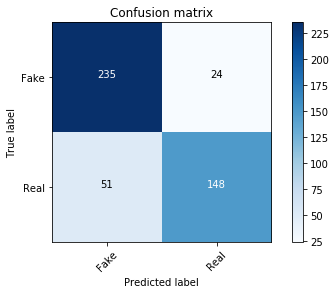

In [101]:
cm = metrics.confusion_matrix(Y_test, predictiongb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [102]:
accgnb=gnb.score(X_test,Y_test)*100
print("Navies Bayes Accuracy Score: {:.2f}%".format(accgnb))

Navies Bayes Accuracy Score: 83.62%


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=1000, random_state=12)
rf.fit(X_train,Y_train)





RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

Confusion matrix, without normalization


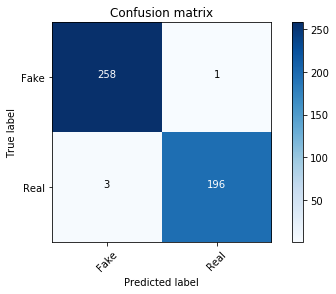

In [104]:
cm = metrics.confusion_matrix(Y_test, predictionrf)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [105]:
accrf=rf.score(X_test,Y_test)*100
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(accrf))

Random Forest Algorithm Accuracy Score: 99.13%


In [106]:
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train,Y_train)
predictionsvm = svm.predict(X_test)

Confusion matrix, without normalization


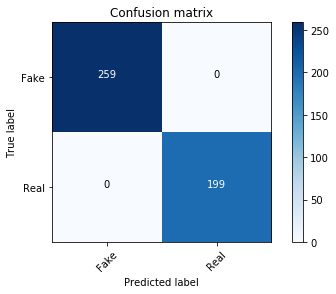

In [107]:
cm = metrics.confusion_matrix(Y_test, predictionsvm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [108]:
accsvm= svm.score(X_test, Y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(accsvm))

Test Accuracy of SVM Algorithm: 100.00%


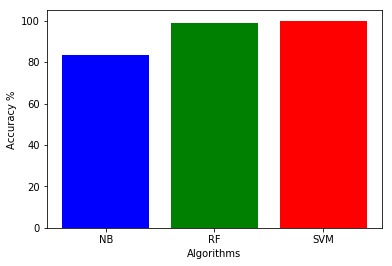

<Figure size 720x360 with 0 Axes>

In [111]:
plt.bar(['NB'],[accgnb], label="NB", color='blue')
plt.bar(['RF'],[accrf], label="RF", color='green')
plt.bar(['SVM'],[accsvm], label="SVM", color='red')


plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.figure(figsize=(10,5))

plt.show()

In [117]:
import webbrowser
from tkinter import Frame,Label,Entry,Button,StringVar,Tk
import numpy as np
root =Tk()
root.configure(bg='#5e515b')

# setting the windows size
root.geometry("800x800")
    
def clearentry():
    entry1.delete(0,'end')
    entry2.delete(0,'end')
    entry3.delete(0,'end')
    entry3.delete(0,'end')
    entry4.delete(0,'end')
    outputlabel.configure(text= 'Output will be shown here')
    
    
def callback(url):
    webbrowser.open_new(url)
    

def take_data():
    d1 = []
    d1.append(entry1.get())
    d1.append(entry2.get())
    d1.append(entry3.get())
    d1.append(entry4.get())
    d2 = []
    d2.append(d1)
    if svm.predict(d2)==1:
        outputlabel.configure(text='FAKE CURRENCY')
        print("FAKE CURRENCY")
    else:  
        outputlabel.configure(text='ORGINAL CURRENCY')
        print("ORGINAL CURRENCY")
    
displayFrame = Frame(root,bg ='#6787d6')
displayFrame.pack(pady=20)

detailsframe = Frame(displayFrame,bg='#d8dbe3')
detailsframe.pack()
desclabel= Label(detailsframe,text = 'FAKE CURRENCY DETECTION USING MACHINE LEARNING',height=2,bg='#d8dbe3',font=('default',20))
desclabel.grid(columnspan=10)

asklabel= Label(detailsframe,text = 'Please Enter input data to check for fake currency',font=('default',14),bg='#d8dbe3',height=2)
asklabel.grid(row=1,padx=80,columnspan=10)

label1 = Label(detailsframe,text='variance',bg='#d8dbe3',font=('default',10))
label1.grid(pady=3,row = 2,column=4)

entry1 = Entry(detailsframe,width=8,font=('default',10))
entry1.grid(row = 2,column=5)

label2 = Label(detailsframe,text='asymmetry',bg='#d8dbe3',font=('default',10))
label2.grid(pady=3,row = 3,column=4)

entry2 = Entry(detailsframe,width=8,font=('default',10))
entry2.grid(row = 3,column=5)

label3 = Label(detailsframe,text='Kurtosis',bg='#d8dbe3',font=('default',10))
label3.grid(pady=3,row = 4,column=4)

entry3 = Entry(detailsframe,width=8,font=('default',10))
entry3.grid(row = 4,column=5)

label4 = Label(detailsframe,text='Image entropy',bg='#d8dbe3',font=('default',10))
label4.grid(pady=3,row = 5,column=4)

entry4 = Entry(detailsframe,width=8,font=('default',10))
entry4.grid(row = 5,column=5)


clearbutton = Button(detailsframe,text='Clear All',bg='#de4b69',font=('default',8),command=lambda:clearentry())
clearbutton.grid(row = 8,column=7,padx=5,pady=5)


checkbutton = Button(detailsframe,text='Check',width=10,bg='#6787d6',font=('default',13),command=lambda:take_data())
checkbutton.grid(columnspan=10,pady=10)

outputlabel = Label(detailsframe,text='output will be shown here',font=('default',12),bg='#d8dbe3',height=2)
outputlabel.grid(padx=80,columnspan=10,pady=5)


root.mainloop()
